# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicaago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

In [3]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

In [4]:
plot_pretty(dpi=150, fontsize=12)

### Monte Carlo methods

Monte Carlo methods use random realization of processes to model a physical or mathematical system. 

Modelling experimental setups is still one of the most common uses of the Monte Carlo approach. However, its range of applications is wide: for example, the (in)famous election outcomes modelling by Nate Silver and Co. 


Monte Carlo methods have a long history and were used before the name was even invented. Enrico Fermi (1901-1954) used what we would call a Monte Carlo method in the 1930s to compute (in his head!) propagation of neutrons in experiments he was working on. 

<img width=200 src="img/Enrico_Fermi_1943-49.jpg"></img>

### The FERMIAC 

He later invented mechanical device to facilitate such calculations, which was nicknamed the **FERMIAC**: 

<img width=400 src="img/fermiac.PNG"></img>

### The origin of the Monte Carlo approach

The approach of using random numbers to sample a distribution to model something was systematically worked out by Stanislaw Ulam and John von Neumann in 1946-1947, who were working at Los Alamos at the time, to model an experimental thermonuclear device designs on the first electronic computer ENIAC. 

<img width=200 src="img/Stan_Ulam_Holding_the_FERMIAC.jpg"></img>

### The origin of the name Monte Carlo 

The name "Monte Carlo" was invented by Nicholas Metropolis (UChicago alum, BSc 1937, PhD 1941), who was motivated by Ulam's stories about his uncle who liked to gamble in Monte Carlo. 

<img width=200 src="img/nicholas_metropolis_maniac_board.jpg"></img>

### An example: the Monty Hall problem

named for its similarity to the "Let's Make a Deal" television game show hosted by Monty Hall. 

The problem is stated as follows. Assume that a room is equipped with three doors. Behind two are goats, and behind the third is a shiny new car. 

<img width=400 src="img/1280px-Monty_open_door.svg.png"></img>

1) You are asked to pick a door, and will win whatever is behind it. Let's say you pick door 1. 

2) Before the door is opened, however, someone who knows what's behind the doors (Monty Hall) opens one of the other two doors, revealing a goat, and asks you if you wish to change your selection to the third door (i.e., the door which neither you picked nor he opened). 

3) The Monty Hall problem is the question of whether you should switch to the other door or not. 



### Monty Hall problem solution by Monte Carlo:

The following way of demonstrating <a href="http://www.probability.ca/jeff/writing/montysimple.html">solution to this problem</a> is presented by Jeffrey Rosenthal in his book <a href="http://www.probability.ca/sbl/">"Struck by Lightning: The Curious World of Probabilities."</a> This is exactly what Monte Carlo approach to modelling a problem is. 

Assume that you always start by picking Door 1, and the host then always shows you some other door which does not contain the car, and you then always switch to the remaining door.

1) If the car is behind Door 1, then after you pick Door 1, the host will open another door (either 2 or 3), and you will then switch to the remaining door (either 3 or 2), thus LOSING.

2) If the car is behind Door 2, then after you pick Door 1, the host will be forced to open Door 3, and you will then switch to Door 2, thus WINNING.

3) If the car is behind Door 3, then after you pick Door 1, the host will be forced to open Door 2, and you will then switch to Door 3, thus WINNING.

Hence, in 2 of the 3 (equally-likely) possibilities, you will win. Therefore, *the probability of winning by switching is 2/3, while probability of winning by not switching is 1/3*

### Another example: the birthday problem

how many people do we need to have in the room to have a 50% probability for two of them to have exactly the same birthday?

In [7]:
nt = 1000
for N in [5, 10, 20, 30, 40, 50, 100]:
    nsame = []
    for n in range(nt):
        # draw uniformly distributed integer numbers from 1 to 365
        days = np.random.randint(low=1, high=365, size=N)
        unique_bdays = np.unique(days)
        nsame.append((np.size(days)-np.size(unique_bdays)+1) // 2 )
    n_same_bday = np.mean(nsame)
    error = np.sqrt(np.var(nsame)/(nt-1))
    print("for N = %d people there are %.3g +- %.3g pairs with the same b-day"%(
        N, n_same_bday, error))

for N = 5 people there are 0.034 +- 0.00573 pairs with the same b-day
for N = 10 people there are 0.125 +- 0.0105 pairs with the same b-day
for N = 20 people there are 0.432 +- 0.0163 pairs with the same b-day
for N = 30 people there are 0.8 +- 0.0195 pairs with the same b-day
for N = 40 people there are 1.26 +- 0.023 pairs with the same b-day
for N = 50 people there are 1.86 +- 0.027 pairs with the same b-day
for N = 100 people there are 6.47 +- 0.0468 pairs with the same b-day


The code above uses <tt>numpy.random.randint</tt> routine to generate uniformly distributed integer numbers from 1 to 365. *Uniformly distributed* means that any number has the same probability to be drawn ($=1/365$). Similarly, the "differential evolution" minimization algorithm uses uniformly distributed integer numbers to select indices of the population members that are involved in mutation. 

How can this be done if we are using a routine that must do something deterministic? To understand this, we need to learn a bit about algorithms that generate *pseudo-random numbers.* Introduction to such algorithms is presented in the <a href="06b_prngs.ipynb"><tt>06b_prngs.ipynb</tt></a> notebook. 

The algorithms for generating uniformly distributed pseudo-random numbers form the basis for algorithms that produce random numbers that follow other distributions, such as the Gaussian distribution used in the "random walk" minimization algorithm. 

### Monte Carlo integration

An average of some function $f(x)$ over a probability distribution function (pdf), $p(x)$, in an interval $[a,b]$ is:

$$
\langle f\rangle_p \equiv \int\limits_a^b f(x)\, p(x)\,dx
$$

Let's consider a uniform pdf  $p(x) = 1/(b-a)$. Then
$$
\langle f\rangle_p =\frac{1}{b-a}\,\int\limits_a^b f(x)\,dx.
$$

Thus, we can compute the integral of $f(x)$ over $[a,b]$ as

$$
\int\limits_a^b f(x)\,dx = (b-a)\,\langle f\rangle_p \approx \frac{b-a}{N}\,\sum\limits_{i=0}^{N-1} f(x_i),
$$

where the last expression on the right assumes that $f$ is evaluated at $N$ random samples, $x_i$, uniformly distributed over the interval and estimates the average using these discrete samples. Samples must be uniformly distributed because we assumed uniform pdf $p(x)$ in deriving this expression. 

### Monte Carlo integration: a test

Here is a simple illustration of the Monte Carlo integration and its accuracy, using function $f(x)=e^{-x}$. It's a useful example because such exponential behavior is common in practice and function is rapidly changing. At the same time, we know the exact answer, which is useful for testing the method. 

In [1]:
"""
Evaluation of int^1_0 e^x dx with the Monte Carlo method
"""

import numpy as np

def func(x):
    return np.exp(-x)

a = 0.; b = 100.
fexact = (np.exp(-a) - np.exp(-b)) 

Ntries = 100
Nr = np.logspace(2, 6, Ntries, dtype=int)
fint = np.zeros(Ntries)

# evaluate integral for a series of number of random samples to see how accuracy scales with Nr
for i, Nrd in enumerate(Nr):
    # using uniform distribution for p(x)
    fint[i] = (b-a) * np.average(func(a+(b-a)*np.random.uniform(0.0, 1.0, Nrd)))
    
ferr  = np.abs(1.  - fint/fexact)

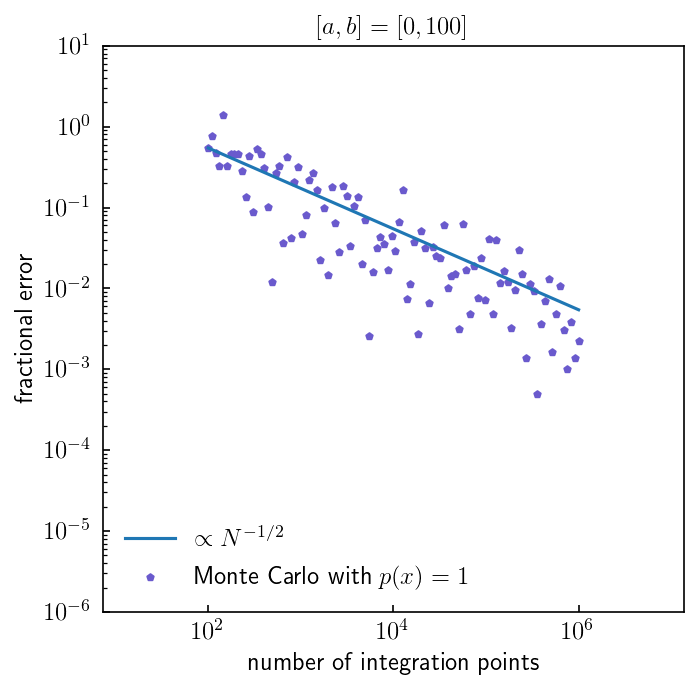

In [5]:
plt.figure(figsize=(5,5))
plt.ylim(1.e-6,10.)
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'number of integration points'); plt.ylabel('fractional error')
plt.scatter(Nr, np.abs(ferr), c='slateblue', s=10, marker=(5, 0), label=r'Monte Carlo with $p(x)=1$')
plt.plot(Nr, np.abs(ferr[0])*np.sqrt(1.*Nr[0]/Nr), label=r'$\propto N^{-1/2}$')

plt.legend(frameon=False, fontsize=12, loc='lower left')
plt.title(r'$[a,b]=[0,100]$', fontsize=12)
plt.show()

Fractional error scales as $\propto 1/\sqrt{N}$. This is a generic feature of the Monte Carlo algorithms, because their accuracy is dominated by the Poisson shot noise. 

"*Monte Carlo is an extremely bad method; it should be used only when all alternative methods
are worse.*” – A.D. Sokal, <a href="https://pdfs.semanticscholar.org/0bfe/9e3db30605fe2d4d26e1a288a5e2997e7225.pdf">MCMC Lecture notes, 1996</a>

Cases when all other methods are worse or are impossible to use usually involve sampling or integrating in more than 3 dimensions. In three or less dimensions faster and much more accurate integration methods are available! They are all built upon the integration methods developed for 1D integration. 

### Recommended reading on the history and logic of Monte Carlo

<a href="https://library.lanl.gov/cgi-bin/getfile?00326866.pdf">"The beginning of the Monte Carlo method"</a> a short paper by <a href="https://en.wikipedia.org/wiki/Nicholas_Metropolis">Nicholas Metropolis</a> on the history of Monte Carlo approach.

<a href="http://www-star.st-and.ac.uk/~kw25/teaching/mcrt/MC_history_3.pdf">Two papers</a> on the history of Monte Carlo method and PNRGs by Roger Eckhardt and Tony Warnock.